In [ ]:
#climate prediction with data set of delhi tmperature and many other aspects

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [14]:
data_r_tst = pd.read_csv('DailyDelhiClimateTest.csv')
data_r_trn = pd.read_csv('DailyDelhiClimateTrain.csv')
train_data=data_r_trn
test_data=data_r_tst

In [21]:
# testing for null values

train_data=train_data.dropna()
test_data=test_data.dropna()

print(test_data.isnull().sum())
print(train_data.isnull().sum())


date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64
date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64


In [23]:
# selecting target variables for traning and testing
x_train = train_data[['humidity','wind_speed','meanpressure']]
y_train = train_data[['meantemp']] 

x_test = test_data[['humidity','wind_speed','meanpressure']]
y_test = test_data[['meantemp']] 

In [26]:
#scale feutre

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [28]:
# using a linear regression model for tihs 

model = LinearRegression()
model.fit(x_train_scaled , y_train)

LinearRegression()

In [29]:
y_pred = model.predict(x_test_scaled)

In [31]:
mse = mean_squared_error(y_test, y_pred)
r2 =r2_score(y_test, y_pred)

print(f'Mean squared Error : {mse}')
print(f'R-squared: {r2}')


Mean squared Error : 37.84033447787638
R-squared: 0.056249204432876065


In [42]:
#convertion code for array 2d to 1d
y_test = y_test.ravel() 
y_pred = y_pred.ravel()

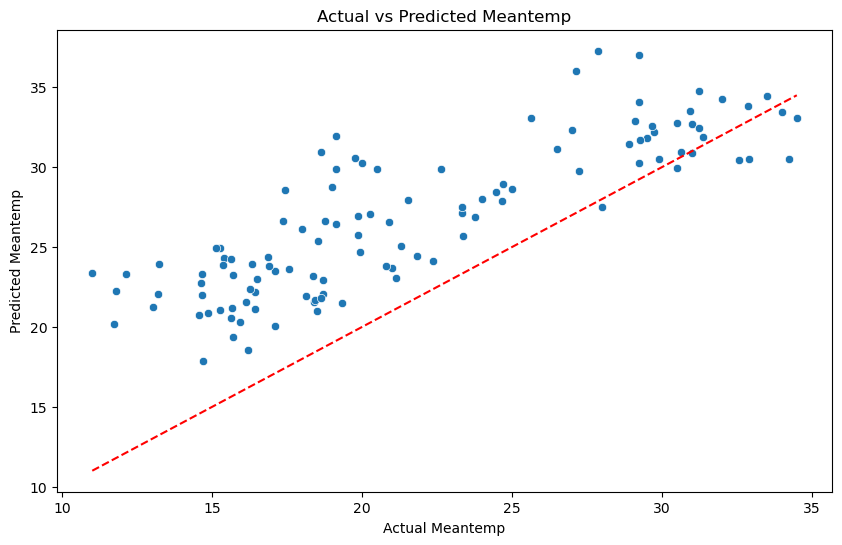

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
plt.xlabel('Actual Meantemp')
plt.ylabel('Predicted Meantemp')
plt.title('Actual vs Predicted Meantemp')
plt.show()

In [44]:
joblib.dump(model,'wethr_prdt_modl.pkl')

['wethr_prdt_modl.pkl']

In [ ]:
weather_data = pd.read_csv('DailyDelhiClimateTrain.csv')  

print(weather_data.head())

X = weather_data[['humidity', 'wind_speed', 'meanpressure']]

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

joblib.dump(scaler, 'scaler.pkl')

print("Scaler saved as scaler.pkl")
